In [ ]:
import numpy as np

Массив numpy представляет собой сетку значений одного типа и индексируется кортежем неотрицательных целых чисел. 
Число измерений-это ранг массива; форма массива - это кортеж целых чисел, дающих размер массива вдоль каждого измерения.

Мы можем инициализировать массивы numpy из стандартных списков Python и получить доступ к элементам с помощью квадратных скобок:

In [5]:
import numpy as np
a = np.array([1, 2, 3])
print(type([1, 2, 3]))
print(type(a))            
print(a.shape)           
print(a[0], a[1], a[2])   
a[0] = 5                  
print(a)

<class 'list'>
<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [6]:
import numpy as np
b = np.array([[1,2,3],[4,5,6]])
print(b.shape)
print(b)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
[[1 2 3]
 [4 5 6]]
1 2 4


NumPy включает в себя множество функций для создания массивов:
(Про все остальные способы создать массив можно прочитать в документации https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation)

In [7]:
import numpy as np
a = np.zeros((2,2))
print(a)

[[0. 0.]
 [0. 0.]]


In [8]:
b = np.ones((1,2))
print(b)

[[1. 1.]]


In [9]:
c = np.full((2,2), 7)
print(c)

[[7 7]
 [7 7]]


In [10]:
d = np.eye(2)
print(d)

[[1. 0.]
 [0. 1.]]


In [11]:
e = np.random.random((2,2))
print(e)

[[0.3664438  0.15447714]
 [0.44653449 0.34468082]]


*Индексации массива*
Numpy предлагает несколько способов индексирования.

Срезы:
так же как в списках в Python. Поскольку массивы могут быть многомерными, необходимо указать срез для каждого измерения массива.

In [20]:
import numpy as np
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a, '\n')
b = a[:2, 1:3]
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[[2 3]
 [6 7]]


Срез списка указывает на те же данные, изменяя срез мы изменим и исходный список.

In [14]:
import numpy as np
b[0, 0] = 123
print(a, '\n')
print(b)

[[  1 123   3   4]
 [  5   6   7   8]
 [  9  10  11  12]] 

[[123   3]
 [  6   7]]


*Целочисленное индексирование*
При индексировании с помощью срезов результат всегда будет подмассивом исходного. Целочисленное индексирование позволяет создавать произвольные массивы, используя данные из другого массива. [ст, стр]

In [21]:
import numpy as np
a = np.array([[1,2], [3, 4], [5, 6]])
b = a[[0, 1, 2], [0, 1, 0]]

print(a, a.shape, '\n')
print(b, b.shape)

[[1 2]
 [3 4]
 [5 6]] (3, 2) 

[1 4 5] (3,)


Пример выше эквивалентен такому:

In [43]:
import numpy as np
b = np.array([a[1, 0], a[1, 1], a[2, 0]])
print(b, b.shape)

[3 4 5] (3,)


In [48]:
print (a)
print(a[[0, 0], [1, 0]])
# Пример выше эквивалентен такому:
print(np.array([a[0, 1], a[0, 1]]))

[[1 2]
 [3 4]
 [5 6]]
[2 1]
[2 2]


In [ ]:
Один полезный трюк с целочисленным индексированием массива -- выбор или изменеие одного элемента из каждой строки матрицы:

In [49]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a, '\n')

# Создадим массив индексов
b = np.array([0, 2, 0, 1])

# Выбирем один элемент из скаждой строки по индексам из b
print(a[np.arange(4), b], '\n')  

# Изменим эти элементы
a[np.arange(4), b] += 10

print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[ 1  6  7 11] 

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Можно также смешивать целочисленное индексирование со срезами. Это даст массив более низкого ранга, чем исходный массив.

In [50]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

row_r1 = a[1, :]    # Rank 1 ссылается на вторую строчку a
row_r2 = a[1:2, :]  # Rank 2 ссылается на вторую строчку a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


Со столбцами всё точно так же

In [51]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape) 
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


*Логическое индексирование*
позволяет выбирать произвольные элементы массива. Часто этот тип индексирования используется для выбора элементов массива, удовлетворяющих некоторому условию. Вот пример:

In [52]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Возвращает массив Booleans такого же размера как a

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


Используем логическое индексирование массива чтобы построить массив состоящий из элементов a, соответствующих истинным значениям из bool_idx

In [53]:
print(a[bool_idx])


[3 4 5 6]


In [54]:
print(a[a > 2]) #all in one row

[3 4 5 6]


*Типы данных*
Каждый массив numpy представляет собой сетку элементов одного типа. Numpy содержит большой набор числовых типов данных, которые можно использовать для создания массивов. Numpy пытается угадать тип данных при создании массива, но функции, которые строят массивы, обычно также включают необязательный аргумент для явного указания типа данных. Вот пример:

In [3]:
import numpy as np
x = np.array([1, 2])
print(x.dtype)

x = np.array([1.0, 2.0])   
print(x.dtype)

x = np.array([1, 2], dtype=np.float64)
print(x.dtype)

int32
float64
float64


*Арифметика массивов*
Основные математические функции работают по элементно в массивах и доступны как в качестве перегрузок операторов, так и в качестве функций в модуле numpy:
Поэлементная сумма, разность, умножение, деление и квадратный корень.

In [4]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x + y)
print(np.add(x, y))

print(x - y)
print(np.subtract(x, y))

print(x * y) # поэлементное умножение!!
print(np.multiply(x, y))

print(x / y)
print(np.divide(x, y))

print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [6]:
# матричное произведение
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [7]:
# скалярное произведение векторов
print(v.dot(w))
print(np.dot(v, w))

219
219


In [8]:
# умножение матрицы на вектор
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [9]:
# вычисления на массивах
x = np.array([[1,2],[3,4]])

print(x, '\n')

print(np.sum(x))          # Сумма всех элементов
print(np.sum(x, axis=0))  # Сумма каждого столбца
print(np.sum(x, axis=1))  # Сумма каждой строки

[[1 2]
 [3 4]] 

10
[4 6]
[3 7]


In [10]:
# транспонирование матрица или вектора(ничего другого не даёт)
x = np.array([[1,2], [3,4]])
print(x,'\n')
print(x.T, '\n')

v = np.array([1,2,3])
print(v)
print(v.T)

[[1 2]
 [3 4]] 

[[1 3]
 [2 4]] 

[1 2 3]
[1 2 3]


*Broadcasting*
мощный механизм, позволяющий numpy работать с массивами различной формы при выполнении арифметических операций. Часто у нас есть меньший массив и больший массив, и мы хотим использовать меньший массив несколько раз для выполнения некоторой операции над большим массивом.

Например, предположим, что мы хотим добавить постоянный вектор к каждой строке матрицы. Мы можем сделать это так:

In [11]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Пустая (заполненная мусором) матрица той же размерности, что и x

# Для каждой строки матрицы x в цикле доболяем вектор v
for i in range(4):
    y[i, :] = x[i, :] + v

print(x, '\n')
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [12]:
# аналогично - укладка нескольких копий v вертикально, а затем выполнение элементарного суммирования x и vv. 
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Склеить 4 копии вектора v друг на друга
print(vv, '\n')                 

y = x + vv  # Сложение из numpy
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]] 

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting позволяет нам выполнять это вычисление без фактического создания нескольких копий v.

In [13]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Скорость:

In [18]:
import time

size_of_vec = 30000

def python():
    start = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - start

def numpy():
    start = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - start

print("Numpy is in this example {} times faster!".format(python()/numpy()))

Numpy is in this example 14.497795256822787 times faster!


**Упражнение 1**
Постройте график ускорения получаемого с использованием массивов numpy по сравнению со списками в питоне от размера массива. Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте. (можно использовать модуль Timer из библиотеки timeit)

Используйте функцию z = 2*x**2 + 4*y
Перемножение матриц размера n на n

In [97]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random

In [98]:
def np_check():
    start = time.time()
    x = np.arange(size_of_vec)
    y = np.arange(size_of_vec)
    z = 2*x**2 + 4*y
    return time.time() - start

In [99]:
def py_check():
    start = time.time()
    x = range(size_of_vec)
    y = range(size_of_vec)
    z = [2*x[i]**2 + 4*y[i] for i in range(len(x)) ]
    return time.time() - start

<function matplotlib.pyplot.show(*args, **kw)>

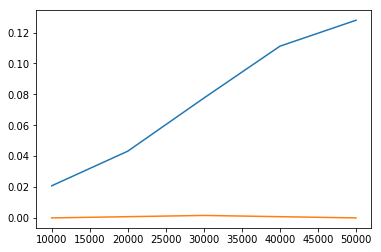

In [100]:
times_py = []
times_np = []
size = [10000, 20000, 30000, 40000, 50000]
for size_of_vec in size:
    median_py = 0
    median_np = 0
    for i in range (5):
        median_py += py_check()/5
        median_np += np_check()/5
    times_py.append(median_py)
    times_np.append(median_np)
plt.plot(size, times_py, size, times_np)
plt.show

**Упражнение 2**
Создать массив чисел от 2 до 75. Вывести только нечётные.
Присвоить нечётным числам этого массива значение -1.

In [49]:
a = np.arange(2, 76)
print (a[a%2==1])   
# Here, the operation a%2==1 returns a Boolean array array([ True, False,  True, False,  True, False], 
# dtype=bool) which is True if the remainder/modulus after dividing by 2 (which is given by a%2) value is 1 
# and False if its 0. Using this as an argument for your array a will return only the a values for which the argument is 'True'. 
# This yields only odd numbers from a.
a[a%2==1] = -1
print (a)


[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75]
[ 2 -1  4 -1  6 -1  8 -1 10 -1 12 -1 14 -1 16 -1 18 -1 20 -1 22 -1 24 -1
 26 -1 28 -1 30 -1 32 -1 34 -1 36 -1 38 -1 40 -1 42 -1 44 -1 46 -1 48 -1
 50 -1 52 -1 54 -1 56 -1 58 -1 60 -1 62 -1 64 -1 66 -1 68 -1 70 -1 72 -1
 74 -1]


**Упражнение 3**
прочитать про функцию reshape, запустить и понять все примеры https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html?highlight=reshape#numpy.reshape
Найти в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. Вспомнить как то же самое проделать с множествами

In [ ]:
a = np.zeros((10, 2))
# A transpose makes the array non-contiguous
b = a.T
# Taking a view makes it possible to modify the shape without modifying
# the initial object.
c = b.view()
c.shape = (20)
#----> 7 c.shape = (20)

#AttributeError: incompatible shape for a non-contiguous array

The order keyword gives the index ordering both for fetching the values from a, and then placing the values into the output array. For example, let’s say you have an array:

In [54]:
a = np.arange(6).reshape((3, 2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

You can think of reshaping as first raveling the array (using the given index order), then inserting the elements from the raveled array into the new array using the same kind of index ordering as was used for the raveling.

In [59]:
np.reshape(a, (2, 3)) # C-like index ordering

array([[0, 1, 2],
       [3, 4, 5]])

In [60]:
np.reshape(np.ravel(a), (2, 3)) # equivalent to C ravel then C reshape

array([[0, 1, 2],
       [3, 4, 5]])

In [61]:
np.reshape(a, (2, 3), order='F') # Fortran-like index ordering

array([[0, 4, 3],
       [2, 1, 5]])

In [62]:
np.reshape(np.ravel(a, order='F'), (2, 3), order='F')

array([[0, 4, 3],
       [2, 1, 5]])

**Examples**

In [63]:
a = np.array([[1,2,3], [4,5,6]])
>>> np.reshape(a, 6)

array([1, 2, 3, 4, 5, 6])

In [65]:
np.reshape(a, 6, order='F')

array([1, 4, 2, 5, 3, 6])

In [85]:
np.reshape(a, (3,-3))       # the unspecified value is inferred to be 2

array([[1, 2],
       [3, 4],
       [5, 6]])

**Упражнение 4**
Создать случайную квадратную матрицу случайного размера от 10 до 100.
Найти максимум и сумму элементов.
Поделить каждый элемент на максимум.
Отнять от каждой строки матрицы среднее по строке
Заменить максимальное значение на -1.

In [102]:
n = random.randint(3, 7)
b = np.random.choice (100, n*n)
r = np.reshape(b, (n, n))
print("New array:", r, "\n")

M = np.ma.max(r)
print("Maximum:", M, "\n")

devided = r/M
print("Division:", devided, "\n")

r[r == M] = -1
print("-1:", r)


New array: [[ 4  8 59 61 23]
 [81 71 10 46 68]
 [59  3 25 80 24]
 [ 1 10 33  1 33]
 [11 36 64 37 34]] 

Maximum: 81 

Division: [[0.04938272 0.09876543 0.72839506 0.75308642 0.28395062]
 [1.         0.87654321 0.12345679 0.56790123 0.83950617]
 [0.72839506 0.03703704 0.30864198 0.98765432 0.2962963 ]
 [0.01234568 0.12345679 0.40740741 0.01234568 0.40740741]
 [0.13580247 0.44444444 0.79012346 0.45679012 0.41975309]] 

-1: [[ 4  8 59 61 23]
 [-1 71 10 46 68]
 [59  3 25 80 24]
 [ 1 10 33  1 33]
 [11 36 64 37 34]]


**Упражнение 5**
Научиться записывать наймпай массив в файл.
Научиться читать массив из файла.

In [104]:
x = np.arange(20).reshape((4,5))
np.savetxt('test.txt', x)
print(np.loadtxt('test.txt'))

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]]


**Упражнение 6**
Как в массиве найти ближайший элемент к данному?

In [86]:
import numpy as np
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

array = np.random.random(10)
print(array, '\n')

value = 0.5

print(find_nearest(array, value))

[0.65709656 0.5358607  0.22277305 0.93460088 0.29586112 0.27755401
 0.36960207 0.56796433 0.62560982 0.23139352] 

0.5358606974957065
